Printed and electronic copies of *Modeling and Simulation in Python* are available from [No Starch Press](https://nostarch.com/modeling-and-simulation-python) and [Bookshop.org](https://bookshop.org/p/books/modeling-and-simulation-in-python-allen-b-downey/17836697?ean=9781718502161) and [Amazon](https://amzn.to/3y9UxNb).

# Analysis of Population Growth

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [ ]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

In [ ]:
# import functions from modsim

from modsim import *

In this chapter we'll express the models from previous chapters as
difference equations and differential equations, solve the equations,
and derive the functional forms of the solutions. And I'll present some thoughts about the complementary roles of mathematical analysis and simulation.

## Difference Equations

The population models in the previous chapter and this one are simple
enough that we didn't really need to run simulations. We could have
solved them mathematically. For example, we wrote the constant growth
model like this:

```
results[t+1] = results[t] + annual_growth
```

In mathematical notation, we would write the same model like this:

$$x_{n+1} = x_n + c$$

where $x_n$ is the population during year $n$,
$x_{n+1}$ is the population during year $n+1$,
and $c$ is constant annual growth.
This way of representing the model, where future population is a function of current population, is a *difference equation*; see
<https://en.wikipedia.org/wiki/Linear_difference_equation>.

For a given value of $n$, sometimes it is possible to compute $x_n$ directly; that
is, without computing the intervening values from $x_1$ through $x_{n-1}$.

In the case of constant growth we can see that $x_1 = x_0 + c$, and
$x_2 = x_1 + c$. Combining these, we get $x_2 = x_0 + 2c$, then
$x_3 = x_0 + 3c$, and we can see that in general

$$x_n = x_0 + nc$$

So if we want to know $x_{100}$ and we don't care about the other values, we can compute it with one multiplication and one addition.

We can also write the proportional model as a difference equation:

$$x_{n+1} = x_n + \alpha x_n$$

Or more conventionally as:

$$x_{n+1} = x_n (1 + \alpha)$$

Now we can see that $x_1 = x_0 (1 + \alpha)$, and $x_2 = x_0 (1 + \alpha)^2$, and in general

$$x_n = x_0 (1 + \alpha)^n$$

A sequence with this functional form is called a *geometric progression*;
see <http://modsimpy.com/geom>. When $\alpha$ is positive, the factor
$1+\alpha$ is greater than 1, so the elements of the sequence grow
without bound.

Finally, we can write the quadratic model like this:

$$x_{n+1} = x_n + \alpha x_n + \beta x_n^2$$

or with the more conventional parameterization like this:

$$x_{n+1} = x_n + r x_n (1 - x_n / K)$$

There is no analytic solution to this equation, but we can approximate it with a differential equation and solve that, which is what we'll do in the next section.

## Differential Equations

Starting again with the constant growth model

$$x_{n+1} = x_n + c$$

If we define $\Delta x$ to be the change in $x$ from one time step to the next, we can write:

$$\Delta x = x_{n+1} - x_n = c$$

If we define
$\Delta t$ to be the time step, which is one year in the example, we can
write the rate of change per unit of time like this:

$$\frac{\Delta x}{\Delta t} = c$$

This is a *discrete* model, which
means time is only defined at integer values of $n$ and not in between.
But in reality, people are born and die all the time, not once a year,
so it might be more realistic to use a *continuous* model, which means
time is defined at all values of $t$, not just integers.

In a continuous model, we write the rate of change in the
form of a derivative:

$$\frac{dx}{dt} = c$$

This way of representing the model is a *differential equation*, which is an equation that involves at least one derivative (see <http://modsimpy.com/diffeq>).
To solve this equation, we multiply both sides by $dt$:

$$dx = c dt$$

And then integrate both sides:

$$x(t) = c t + x_0$$

Similarly, we can write the proportional growth model like this:

$$\frac{\Delta x}{\Delta t} = \alpha x$$

And as a differential equation
like this:

$$\frac{dx}{dt} = \alpha x$$

If we multiply both sides by
$dt$ and divide by $x$, we get

$$\frac{1}{x}~dx = \alpha~dt$$

Now we
integrate both sides, yielding:

$$\ln x = \alpha t + K$$

where $\ln$ is the natural logarithm and $K$ is the constant of integration.

Exponentiating both sides, we have

$$\exp(\ln(x)) = \exp(\alpha t + K)$$

The exponential function can be written $\exp(x)$ or $e^x$. In this book I use the first form because it resembles the Python code.
We can rewrite the previous equation as

$$x = \exp(\alpha t) \exp(K)$$

Since $K$ is an arbitrary constant,
$\exp(K)$ is also an arbitrary constant, so we can write

$$x = C \exp(\alpha t)$$

where $C = \exp(K)$. There are many solutions to this differential equation, with different values of $C$. The particular solution we want is the one that has the value $x_0$ when $t=0$.

When $t=0$, $x(t) = C$, so $C = x_0$ and the solution we want is

$$x(t) = x_0 \exp(\alpha t)$$

If you would like to see this derivation done more carefully, you might like this video:
<http://modsimpy.com/khan1>.

## Analysis and Simulation

Once you have designed a model, there are generally two ways to proceed: simulation and analysis. Simulation often comes in the form of a computer program that models changes in a system over time, like births and deaths, or bikes moving from place to place. Analysis often comes in the form of algebra and calculus; that is, symbolic manipulation using mathematical notation.

Analysis and simulation have different capabilities and limitations.
Simulation is generally more versatile; it is easy to add and remove parts of a program and test many versions of a model, as we have done in the previous examples.

But there are several things we can do with analysis that are harder or impossible with simulations:

-   With analysis we can sometimes compute, exactly and efficiently, a
    value that we could only approximate, less efficiently, with
    simulation. For example, in the quadratic model we plotted net growth versus population and saw it crosses through zero when the population is
    near 14 billion.  We could estimate the crossing point using a
    numerical search algorithm (more about that later). But with a bit of algebra, we derived the general result that $K=-\alpha/\beta$.

-   Analysis sometimes provides "computational shortcuts", that is, the
    ability to jump forward in time to compute the state of a system
    many time steps in the future without computing the intervening
    states.

-   We can use analysis to state and prove generalizations about models;
    for example, we might prove that certain results will always or
    never occur. With simulations, we can show examples and sometimes
    find counterexamples, but it is hard to write proofs.

-   Analysis can provide insight into models and the systems they
    describe; for example, sometimes we can identify
    qualitatively different ways the system can behave and key parameters that control
    those behaviors.

When people see what analysis can do, they sometimes get drunk with
power and imagine that it gives them a special ability to see past the veil of the material world and discern the laws of mathematics that govern the universe. When they analyze a model of a physical system, they talk about "the math behind it" as if our world is the mere shadow of a world of ideal mathematical entities (I am not making this up; see <http://modsimpy.com/plato>.).

This is, of course, nonsense. Mathematical notation is a language
designed by humans for a purpose, specifically to facilitate symbolic
manipulations like algebra. Similarly, programming languages are
designed for a purpose, specifically to represent computational ideas
and run programs.

Each of these languages is good for the purposes it was designed for and less good for other purposes. But they are often complementary, and one of the goals of this book is to show how they can be used together.

## Analysis with WolframAlpha

Until recently, most analysis was done by rubbing graphite on wood
pulp, a process that is laborious and error-prone. A useful
alternative is symbolic computation. If you have used services like
WolframAlpha, you have used symbolic computation.

For example, if you go to <https://www.wolframalpha.com/> and enter

```
df(t) / dt = alpha f(t)
```

WolframAlpha infers that `f(t)` is a function of `t` and `alpha` is a
parameter; it classifies the query as a "first-order linear ordinary
differential equation", and reports the general solution:

$$f(t) = c_1 \exp(\alpha t)$$

If you add a second equation to specify the initial condition:

```
df(t) / dt = alpha f(t),  f(0) = p_0
```

WolframAlpha reports the particular solution:

$$f(t) = p_0 \exp(\alpha t)$$

WolframAlpha is based on Mathematica, a powerful programming language
designed specifically for symbolic computation.

## Analysis with SymPy

Python has a library called SymPy that provides symbolic computation
tools similar to Mathematica. They are not as easy to use as
WolframAlpha, but they have some other advantages.

To use it, we'll define `Symbol` objects that represent names of variables and functions.
The `symbols` function takes a string and returns `Symbol` objects.

In [1]:
from sympy import symbols

t = symbols('t')

Now when we use `t`, Python treats it like a variable name rather than a specific number.
For example, if we use `t` as part of an expression, like this,

In [2]:
expr = t + 1
expr

t + 1

Python doesn't try to perform numerical addition; rather, it creates a
new `Symbol` that represents the sum of `t` and `1`. We can evaluate the
sum using `subs`, which substitutes a value for a symbol. This example
substitutes 2 for `t`:

In [3]:
expr.subs(t, 2)

3

Functions in SymPy are represented by a special kind of `Symbol`:

In [4]:
from sympy import Function

f = Function('f')
f

f

Now if we write `f(t)`, we get an object that represents the evaluation of a function, $f$, at a value, $t$.

In [5]:
f(t)

f(t)

But again SymPy doesn't actually
try to evaluate it.

## Differential Equations In SymPy

SymPy provides a function, `diff`, that can differentiate a function. We can apply it to `f(t)` like this:

In [6]:
from sympy import diff

dfdt = diff(f(t), t)
dfdt

Derivative(f(t), t)

The result is a `Symbol` that represents the derivative of `f` with
respect to `t`. But again, SymPy doesn't try to compute the derivative
yet.

To represent a differential equation, we use `Eq`:

In [7]:
from sympy import Eq

alpha = symbols('alpha')
eq1 = Eq(dfdt, alpha*f(t))
eq1

Eq(Derivative(f(t), t), alpha*f(t))

The result is an object that represents an equation.  Now
we can use `dsolve` to solve this differential equation:

In [8]:
from sympy import dsolve

solution_eq = dsolve(eq1)
solution_eq

Eq(f(t), C1*exp(alpha*t))

The result is the *general solution*, which still contains an unspecified constant, $C_1$.
To get the *particular solution* where $f(0) = p_0$, we substitute $p_0$ for `C1`.
First, we have to tell Python that `C1` is a symbol.

In [9]:
C1 = symbols('C1')

Now we can substitute the value of $p_0$ for `C1`.
For example, if $p_0$ is 1000:

In [10]:
particular = solution_eq.subs(C1, 1000)
particular

Eq(f(t), 1000*exp(alpha*t))

When $t=0$, the value of $f(0)$ is $p_0$, which confirms that this is the solution we want.

In [11]:
particular.subs(t, 0)

Eq(f(0), 1000)

## Solving the Quadratic Growth Model

To solve the quadratic growth curve, we'll use the `r, K` parameterization, so we'll need two more symbols:

In [12]:
r, K = symbols('r K')

Now we can write the differential equation.

In [13]:
eq2 = Eq(diff(f(t), t), r * f(t) * (1 - f(t)/K))
eq2

Eq(Derivative(f(t), t), r*(1 - f(t)/K)*f(t))

And solve it.

In [14]:
solution_eq = dsolve(eq2)
solution_eq

Eq(f(t), K*exp(C1*K + r*t)/(exp(C1*K + r*t) - 1))

The result, `solution_eq`, contains `rhs`, which is the right-hand side of the solution.

In [15]:
general = solution_eq.rhs
general

K*exp(C1*K + r*t)/(exp(C1*K + r*t) - 1)

We can evaluate the right-hand side at $t=0$

In [16]:
at_0 = general.subs(t, 0)
at_0

K*exp(C1*K)/(exp(C1*K) - 1)

Now we want to find the value of `C1` that makes `f(0) = p_0`.

So we'll create the equation `at_0 = p_0` and solve for `C1`.  Because this is just an algebraic equation, not a differential equation, we use `solve`, not `dsolve`.

In [17]:
from sympy import solve

p_0 = symbols('p_0')
solutions = solve(Eq(at_0, p_0), C1)

The result from `solve` is a list of solutions.  

In [18]:
type(solutions), len(solutions)

(list, 1)

In this case, there is only one solution, but we still get a list, so we have to use the bracket operator, `[0]`, to select the first one.

In [19]:
value_of_C1 = solutions[0]
value_of_C1

log(-p_0/(K - p_0))/K

Now in the general solution, we want to replace `C1` with the value of `C1` we just figured out.

In [20]:
particular = general.subs(C1, value_of_C1)
particular

-K*p_0*exp(r*t)/((K - p_0)*(-p_0*exp(r*t)/(K - p_0) - 1))

The result is complicated, but SymPy provides a function that tries to simplify it.

In [21]:
simpler = particular.simplify()
simpler

K*p_0*exp(r*t)/(K + p_0*exp(r*t) - p_0)

This function is called the *logistic growth curve*; see
<http://modsimpy.com/logistic>. In the context of growth models, the
logistic function is often written like this:

$$f(t) = \frac{K}{1 + A \exp(-rt)}$$

where $A = (K - p_0) / p_0$.

We can use SymPy to confirm that these two forms are equivalent.  First we represent the alternative version of the logistic function:

In [22]:
A = (K - p_0) / p_0
A

(K - p_0)/p_0

In [23]:
from sympy import exp

logistic = K / (1 + A * exp(-r*t))
logistic

K/(1 + (K - p_0)*exp(-r*t)/p_0)

To see whether two expressions are equivalent, we can check whether their difference simplifies to 0.

In [24]:
(particular - logistic).simplify()

0

This test only works one way: if SymPy says the difference reduces to 0, the expressions are definitely equivalent (and not just numerically close).

But if SymPy can't find a way to simplify the result to 0, that doesn't necessarily mean there isn't one.  Testing whether two expressions are equivalent is a surprisingly hard problem; in fact, there is no algorithm that can solve it in general.

If you use SymPy to compute an expression, and then want to evaluate that expression in Python, SymPy provides a function called `pycode` that generates Python code:

In [25]:
from sympy.printing.pycode import pycode

pycode(simpler)

'K*p_0*math.exp(r*t)/(K + p_0*math.exp(r*t) - p_0)'

If you would like to see this differential equation solved by hand, you might like this video: <http://modsimpy.com/khan2>

## Summary

In this chapter we wrote the growth models from the previous chapters in terms of difference and differential equations. We solved some of these equations by hand; for others, we used WolframAlpha and SymPy.

What I called the "constant growth" model is more commonly called *linear growth* because the solution is a line.  If we model time as continuous, the solution is

$$f(t) = p_0 + c t$$

where $c$ is net annual growth.

Similarly, the proportional growth model is usually called *exponential growth* because the solution is an exponential function:

$$f(t) = p_0 \exp{\alpha t}$$

Finally, the quadratic growth model is called *logistic growth* because the solution is a logistic function:

$$f(t) = \frac{K}{1 + A \exp(-rt)}$$

where $A = (K - p_0) / p_0$.

I avoided these terms until now because they are based on results we had not derived yet.

With that, we are done modeling world population growth.
The next chapter presents case studies where you can apply the tools we have learned so far.

--- SymPy Solving Process ---
[Linear Model] Solution: p(t) = 0.07*t + 2.5576
[Exponential Model] Solution: p(t) = 2.5576*exp(0.019*t)
[Logistic Model] Solution: p(t) = 3.13487923311656*exp(0.025*t)/(0.225711304784392*exp(0.025*t) + 1)
-----------------------------



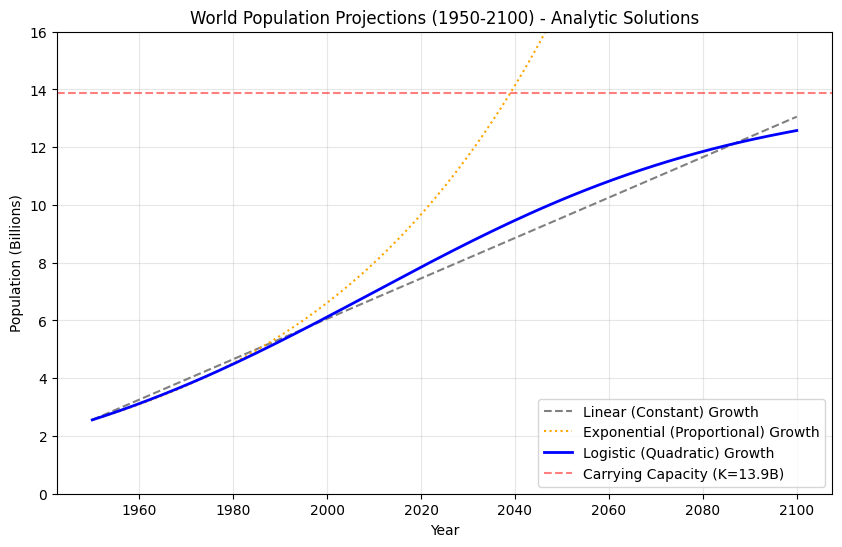

In [27]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# 1. 모듈: 미분 방정식 해석 및 예측 클래스 (Analysis Module)
# -----------------------------------------------------------
class PopulationAnalyzer:
    def __init__(self):
        # 기호 정의 (Symbols)
        self.t = sp.symbols('t')        # 시간
        self.p = sp.Function('p')(self.t) # 인구 함수 p(t)
        self.alpha, self.beta, self.c = sp.symbols('alpha beta c') # 파라미터

    def solve_linear(self, t_0, p_0, annual_growth):
        """
        상수 성장 모델 (Constant/Linear Growth)
        dp/dt = c
        """
        # 1. 미분 방정식 정의
        diff_eq = sp.Eq(self.p.diff(self.t), self.c)

        # 2. 일반해(General Solution) 구하기
        general_sol = sp.dsolve(diff_eq, self.p)

        # 3. 특수해(Particular Solution) 구하기 (t=0일 때 p=p_0)
        # dsolve 결과에는 적분 상수 C1이 포함됨. 초기 조건을 대입해 C1을 찾음.
        # t=0 시점 기준이므로 수식 내 t는 (year - t_0)를 의미함
        C1 = sp.solve(general_sol.rhs.subs(self.t, 0) - p_0, 'C1')[0]
        particular_sol = general_sol.subs('C1', C1).subs(self.c, annual_growth)

        print(f"[Linear Model] Solution: p(t) = {particular_sol.rhs}")

        # 4. 수식을 파이썬 함수로 변환 (Lambdify)
        # 입력: 실제 연도(year), 출력: 인구
        func = sp.lambdify(self.t, particular_sol.rhs, modules='numpy')
        return lambda year: func(year - t_0)

    def solve_exponential(self, t_0, p_0, growth_rate):
        """
        비례 성장 모델 (Proportional/Exponential Growth)
        dp/dt = alpha * p
        """
        diff_eq = sp.Eq(self.p.diff(self.t), self.alpha * self.p)
        general_sol = sp.dsolve(diff_eq, self.p)

        # 초기 조건 대입 (t=0, p=p_0)
        # 일반해 형태: p(t) = C1 * exp(alpha * t)
        C1_sol = sp.solve(general_sol.rhs.subs(self.t, 0) - p_0, 'C1')
        if not C1_sol: C1 = p_0 # 예외 처리
        else: C1 = C1_sol[0]

        particular_sol = general_sol.subs('C1', C1).subs(self.alpha, growth_rate)

        print(f"[Exponential Model] Solution: p(t) = {particular_sol.rhs}")

        func = sp.lambdify(self.t, particular_sol.rhs, modules='numpy')
        return lambda year: func(year - t_0)

    def solve_logistic(self, t_0, p_0, alpha_val, beta_val):
        """
        이차 성장 모델 (Quadratic/Logistic Growth)
        dp/dt = alpha * p + beta * p^2
        """
        diff_eq = sp.Eq(self.p.diff(self.t), self.alpha * self.p + self.beta * self.p**2)

        # logistic 방정식은 hint='Bernoulli' 등을 사용하여 풀 수 있음
        general_sol = sp.dsolve(diff_eq, self.p)

        # 초기 조건 대입이 복잡하므로 SymPy의 solve를 활용
        # t=0일 때 식의 값과 p_0가 같아야 함
        eq_at_0 = general_sol.rhs.subs(self.t, 0) - p_0
        C1_vals = sp.solve(eq_at_0, 'C1')

        # 유효한 실수 해 찾기
        C1 = C1_vals[0]

        particular_sol = general_sol.subs('C1', C1).subs({self.alpha: alpha_val, self.beta: beta_val})

        # 식 단순화
        final_eq = sp.simplify(particular_sol.rhs)
        print(f"[Logistic Model] Solution: p(t) = {final_eq}")

        func = sp.lambdify(self.t, final_eq, modules='numpy')
        return lambda year: func(year - t_0)

# -----------------------------------------------------------
# 2. 실행 및 파라미터 설정 (Configuration & Execution)
# -----------------------------------------------------------

# 초기 조건 (1950년 데이터 기준)
t_0 = 1950
p_0 = 2.5576  # 1950년 세계 인구 (단위: 십억 명)
t_end = 2100  # 예측 종료 시점

# 모델별 파라미터 (이전 챕터들에서 추정된 값들)
# 1. 선형: 매년 0.07억명 증가
params_linear = {'annual_growth': 0.070}
# 2. 지수: 연간 성장률 약 1.9%
params_exp = {'growth_rate': 0.019}
# 3. 로지스틱: alpha=0.025, beta=-0.0018 (수용력 K = -alpha/beta ≈ 13.8억명)
params_quad = {'alpha_val': 0.025, 'beta_val': -0.0018}

# 분석기 객체 생성
analyzer = PopulationAnalyzer()

# 각 모델의 예측 함수 생성 (SymPy가 미분방정식을 풀어서 만들어줌)
print("--- SymPy Solving Process ---")
predict_linear = analyzer.solve_linear(t_0, p_0, **params_linear)
predict_exp = analyzer.solve_exponential(t_0, p_0, **params_exp)
predict_logistic = analyzer.solve_logistic(t_0, p_0, **params_quad)
print("-----------------------------\n")

# -----------------------------------------------------------
# 3. 시각화 (Visualization)
# -----------------------------------------------------------
def plot_projections():
    # 1950년부터 2100년까지 연도 생성
    years = np.arange(t_0, t_end + 1)

    # 예측값 계산
    pop_linear = predict_linear(years)
    pop_exp = predict_exp(years)
    pop_logistic = predict_logistic(years)

    plt.figure(figsize=(10, 6))

    # 그래프 그리기
    plt.plot(years, pop_linear, '--', label='Linear (Constant) Growth', color='gray')
    plt.plot(years, pop_exp, ':', label='Exponential (Proportional) Growth', color='orange')
    plt.plot(years, pop_logistic, '-', label='Logistic (Quadratic) Growth', color='blue', linewidth=2)

    # 수용력(Carrying Capacity) 표시 (Logistic 모델의 경우)
    K = -params_quad['alpha_val'] / params_quad['beta_val']
    plt.axhline(y=K, color='red', linestyle='--', alpha=0.5, label=f'Carrying Capacity (K={K:.1f}B)')

    # 설정
    plt.title(f"World Population Projections ({t_0}-{t_end}) - Analytic Solutions")
    plt.xlabel("Year")
    plt.ylabel("Population (Billions)")
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Y축 범위 제한 (지수 모델이 너무 치솟으므로 보기 좋게 자름)
    plt.ylim(0, 16)

    plt.show()

# 그래프 출력
plot_projections()

## Exercises

This chapter is available as a Jupyter notebook where you can read the text, run the code, and work on the exercises.
You can access the notebooks at <https://allendowney.github.io/ModSimPy/>.

### Exercise 1

 Use SymPy to solve the quadratic growth equation using the alternative parameterization

$$ \frac{df(t)}{dt} = \alpha f(t) + \beta f^2(t) $$


In [26]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

### Exercise 2

  Use [WolframAlpha](https://www.wolframalpha.com/) to solve the quadratic growth model, using either or both forms of parameterization:

    df(t) / dt = alpha f(t) + beta f(t)^2

or

    df(t) / dt = r f(t) (1 - f(t)/K)

Find the general solution and also the particular solution where `f(0) = p_0`.